<a href="https://colab.research.google.com/github/paulopetrillo/PROJETO_IFMA_SOFTEX/blob/main/Multinomial_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importa a biblioteca numpy
import numpy as np
print(np.__version__)

1.25.2


In [2]:
# importa biblioteca Pandas.
import pandas as pd
print(pd.__version__)

1.5.3


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# pacotes para regressão logistica
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [5]:
# # Grava datDataFrame_Geral em Googe drive
# #drive.mount('/content/drive')
# DataFrame_Geral.to_csv('./drive/MyDrive/DataFrame_Geral.csv')
# DataFrame_Geral= pd.read_csv("./drive/MyDrive/Colab Notebooks/DataFrame_Geral.csv", header=0, sep=",")
DataFrame_Geral = pd.read_csv("./drive/MyDrive/DataFrame_Geral.csv", header=0, sep=",")
DataFrame_Geral

,Unnamed: 0,mandante,golsMand,golsVist,vistante,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado
0,116,Atlético,4,3,São Paulo,9,6,8,5,1
1,117,Atlético,2,0,Santos,12,0,7,4,1
2,123,Sport,0,0,Atlético,6,11,9,12,0
3,130,Palmeiras,0,1,Internacional,8,5,5,4,2
4,131,Atlético,1,2,Botafogo,14,7,6,6,2
...,...,...,...,...,...,...,...,...,...,...
2535,375,Fortaleza - CE,2,1,Bahia - BA,6,1,5,6,1
2536,376,Sport - PE,1,1,Athletico Paranaense - PR,6,3,4,6,0
2537,377,Red Bull Bragantino - SP,1,0,Internacional - RS,8,1,3,6,1
2538,378,Juventude - RS,1,0,Corinthians - SP,4,3,1,9,1


In [6]:
# visvit (dataframe visao vitoria)
DataFrame_Geral_reglog = DataFrame_Geral.copy()
DataFrame_Geral_reglog

,Unnamed: 0,mandante,golsMand,golsVist,vistante,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado
0,116,Atlético,4,3,São Paulo,9,6,8,5,1
1,117,Atlético,2,0,Santos,12,0,7,4,1
2,123,Sport,0,0,Atlético,6,11,9,12,0
3,130,Palmeiras,0,1,Internacional,8,5,5,4,2
4,131,Atlético,1,2,Botafogo,14,7,6,6,2
...,...,...,...,...,...,...,...,...,...,...
2535,375,Fortaleza - CE,2,1,Bahia - BA,6,1,5,6,1
2536,376,Sport - PE,1,1,Athletico Paranaense - PR,6,3,4,6,0
2537,377,Red Bull Bragantino - SP,1,0,Internacional - RS,8,1,3,6,1
2538,378,Juventude - RS,1,0,Corinthians - SP,4,3,1,9,1


In [7]:
# Apaga colunas desnecessarias para o treinamento.
DataFrame_Geral_reglog.drop(['mandante',
                             'golsMand',
                             'golsVist',
                             'vistante',
                             'Unnamed: 0'], axis=1, inplace=True)
DataFrame_Geral_reglog

,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado
0,9,6,8,5,1
1,12,0,7,4,1
2,6,11,9,12,0
3,8,5,5,4,2
4,14,7,6,6,2
...,...,...,...,...,...
2535,6,1,5,6,1
2536,6,3,4,6,0
2537,8,1,3,6,1
2538,4,3,1,9,1


In [8]:
# Definir as variáveis ​​preditoras e de resposta
features = DataFrame_Geral_reglog[['poder_ataque_time_mandante',
                                   'poder_ataque_time_visitante',
                                   'poder_defesa_time_mandante',
                                   'poder_defesa_time_visitante']]
target = DataFrame_Geral_reglog['classe_resultado']

# Divisão do conjunto de treino e teste

In [9]:
# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=42)

# Treinamento do Modelo

In [10]:
# Criação de instancia do modelo de regressão logística multinomial
logReg = LogisticRegression(multi_class='multinomial',
                            solver='lbfgs',
                            max_iter=1000,
                            verbose=10)

In [11]:
# Treinamento do modelo
logReg = logReg.fit(X_train, y_train)

# Imprime Acurácia do modelo
print("Acurácia do treinamento: %f" % logReg.score(X_train, y_train))
print("Acurácia do teste: %f" % logReg.score(X_test, y_test))

Acurácia do treinamento: 0.488189
Acurácia do teste: 0.519685


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


In [12]:
# # Realizando previsões no conjunto de teste
# y_pred = logReg.predict(X_test)

# # Avaliando a acurácia do modelo
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Acurácia: {accuracy:.2f}')

# # Exibindo o relatório de classificação
# # print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

In [13]:
import pickle

# Salva o modelo
with open('logReg_model_etapa1.pkl', 'wb') as f:
    pickle.dump(logReg, f)

In [14]:
# Carregue o modelo
with open('logReg_model_etapa1.pkl', 'rb') as f:
    logReg_loaded = pickle.load(f)

In [15]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Modelo Regressão logística')

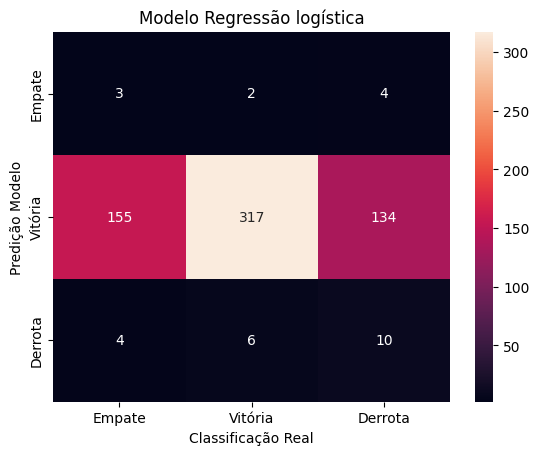

In [17]:
#imprimir a Matriz de Confusão para Regressão Logística
logReg_y_pred = logReg_loaded.predict(X_test)

logReg_cm = metrics.confusion_matrix(logReg_y_pred, y_test)

sns.heatmap(logReg_cm, annot=True, fmt='.0f', xticklabels = ["Empate", "Vitória", "Derrota"] , yticklabels = ["Empate", "Vitória", "Derrota"] )

plt.ylabel('Predição Modelo')
plt.xlabel('Classificação Real')
plt.title('Modelo Regressão logística')

In [20]:
#type(mlp_cm)
type(logReg_cm)

numpy.ndarray

In [21]:
#mlp_cm
confusion_matrix = logReg_cm
confusion_matrix

array([[  3,   2,   4],
       [155, 317, 134],
       [  4,   6,  10]])

In [22]:
# Cálculo da precisão por classe
precision_classes = []
for i in range(3):
    precision_classes.append(confusion_matrix[i, i] / np.sum(confusion_matrix[:, i]))

# Impressão dos resultados
print("Precisão por classe:")
print(f"Empate : {precision_classes[0]:.4f}")
print(f"Vitória: {precision_classes[1]:.4f}")
print(f"Derrota: {precision_classes[2]:.4f}")

# f"Valor: {valor:.4f}"

# Cálculo da precisão geral
precision_geral = np.trace(confusion_matrix) / np.sum(confusion_matrix)

# Impressão da precisão geral
print("Precisão geral:", precision_geral)

# A precisão mede a proporção de previsões positivas feitas pelo modelo que
# estão corretas. Em outras palavras, ela indica a confiabilidade das previsões
# do modelo.

# Uma alta precisão para uma classe indica que o modelo é confiável na
# identificação de exemplos dessa classe.
# Uma baixa precisão pode indicar que o modelo está confundindo a classe com
# outras classes.

# A precisão é sensível ao desequilíbrio de classes.
# Se uma classe for muito mais frequente que as outras, a precisão geral pode
# ser alta mesmo que o modelo tenha um desempenho ruim na identificação das
# classes menos frequentes.

Precisão por classe:
Empate : 0.0185
Vitória: 0.9754
Derrota: 0.0676
Precisão geral: 0.5196850393700787


In [23]:
# Cálculo do recall por classe
recall_classes = []
for i in range(3):
    recall_classes.append(confusion_matrix[i, i] / np.sum(confusion_matrix[i, :]))

# Impressão dos resultados
print("Recall por classe:")
print(f"Empate : {recall_classes[0]:.4f}")
print(f"Vitória: {recall_classes[1]:.4f}")
print(f"Derrota: {recall_classes[2]:.4f}")

#==============================================================================
# Recall = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)
#==============================================================================
# O recall é uma métrica importante para avaliar a capacidade do modelo de
# identificar todos os exemplos de uma classe, mesmo que isso signifique que ele
# irá classificar incorretamente alguns exemplos de outras classes.

Recall por classe:
Empate : 0.3333
Vitória: 0.5231
Derrota: 0.5000


In [24]:
# Cálculo da acurácia
accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)

# Impressão do resultado
print("Acurácia:", accuracy)

# É importante verificar se a matriz de confusão está correta antes de calcular
# a acurácia.
# A acurácia é uma métrica simples que indica a proporção de exemplos que foram
# classificados corretamente pelo modelo. No entanto, ela pode ser enganosa em
# casos de desbalanceamento de classes, quando uma classe é muito mais frequente
# que as outras.

Acurácia: 0.5196850393700787


In [25]:
# Cálculo do F1-score por classe
f1_classes = []
for i in range(3):
    precision = confusion_matrix[i, i] / np.sum(confusion_matrix[:, i])
    recall = confusion_matrix[i, i] / np.sum(confusion_matrix[i, :])
    f1_classes.append(2 * (precision * recall) / (precision + recall))

# Impressão dos resultados
print("F1-score por classe:")
print(f"Empate : {f1_classes[0]:.4f}")
print(f"Vitória: {f1_classes[1]:.4f}")
print(f"Derrota: {f1_classes[2]:.4f}")

# Cálculo do F1-score geral
f1_geral = np.mean(f1_classes)

# Impressão do resultado
print("F1-score geral:", f1_geral)

# F1-score = 2 * (Precisão * Recall) / (Precisão + Recall)
# O F1-score é uma métrica que combina precisão e recall em uma única medida,
# sendo útil para avaliar o desempenho do modelo em problemas de classificação
# com múltiplas classes.

F1-score por classe:
Empate : 0.0351
Vitória: 0.6810
Derrota: 0.1190
F1-score geral: 0.27837450769781596


# ETAPA 2

# Oversampling

In [26]:
# Verificando distribuição das variáveis target
target.value_counts()

1    1258
0     674
2     608
Name: classe_resultado, dtype: int64

In [27]:
# Biblioteca para balanceamento de carga.
from imblearn.over_sampling import SMOTE

In [28]:
##### >>>> Solucao do erro da celula abaixo Sujerida pelo Google <<<< #####
# from sklearn.preprocessing import LabelEncoder

# # Create a LabelEncoder object
# label_encoder = LabelEncoder()

# # Encode the target variable (target = y)
# y_encoded = label_encoder.fit_transform(target)

# Apply SMOTE to the encoded target variable (features = X)
smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(features, y_encoded)
X_resampled, y_resampled = smote.fit_resample(features, target)

In [29]:
# Verificando distribuição das variáveis target após balancemaneto por oversample
y_df = y_resampled
y_DF = pd.DataFrame(y_df)
y_DF.value_counts()

classe_resultado
0                   1258
1                   1258
2                   1258
dtype: int64

In [30]:
# Divisão do conjunto de dados em treino e teste
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_resampled,
                                                                    y_resampled,
                                                                 test_size=0.25,
                                                                random_state=42)

In [31]:
# Criação de instancia do modelo de regressão logística multinomial
logReg_bal = LogisticRegression(multi_class='multinomial',
                                solver='lbfgs',
                                max_iter=1000,
                                verbose=10)

In [32]:
# Treinamento do modelo
logReg_bal = logReg_bal.fit(X_train_bal, y_train_bal)

# Imprime Acurácia do modelo
print("Acurácia do treinamento: %f" % logReg_bal.score(X_resampled, y_resampled))
print("Acurácia do teste: %f" % logReg_bal.score(X_test_bal, y_test_bal))

Acurácia do treinamento: 0.383943
Acurácia do teste: 0.369703


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


In [33]:
# Salva o modelo
with open('logReg_bal_model.pkl', 'wb') as f:
    pickle.dump(logReg_bal, f)

In [34]:
# Carregue o modelo
with open('logReg_bal_model.pkl', 'rb') as f:
    logReg_bal_loaded = pickle.load(f)

Text(0.5, 1.0, 'Modelo Regressão logística')

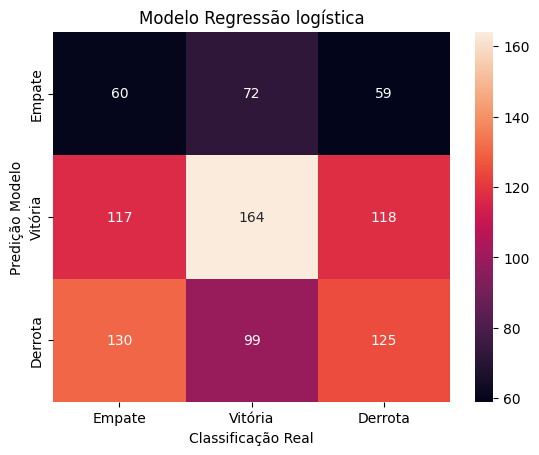

In [36]:
#imprimir a Matriz de Confusão para Regressão Logística
logReg_bal_y_pred = logReg_bal_loaded.predict(X_test_bal)

logReg_bal_cm = metrics.confusion_matrix(logReg_bal_y_pred, y_test_bal)

sns.heatmap(logReg_bal_cm, annot=True, fmt='.0f', xticklabels = ["Empate", "Vitória", "Derrota"] , yticklabels = ["Empate", "Vitória", "Derrota"] )

plt.ylabel('Predição Modelo')
plt.xlabel('Classificação Real')
plt.title('Modelo Regressão logística')

In [37]:
#type(mlp_cm)
type(logReg_bal_cm)

numpy.ndarray

In [38]:
#mlp_cm
confusion_matrix = logReg_bal_cm
confusion_matrix

array([[ 60,  72,  59],
       [117, 164, 118],
       [130,  99, 125]])

In [39]:
# Cálculo da precisão por classe
precision_classes = []
for i in range(3):
    precision_classes.append(confusion_matrix[i, i] / np.sum(confusion_matrix[:, i]))

# Impressão dos resultados
print("Precisão por classe:")
print(f"Empate : {precision_classes[0]:.4f}")
print(f"Vitória: {precision_classes[1]:.4f}")
print(f"Derrota: {precision_classes[2]:.4f}")

# f"Valor: {valor:.4f}"

# Cálculo da precisão geral
precision_geral = np.trace(confusion_matrix) / np.sum(confusion_matrix)

# Impressão da precisão geral
print("Precisão geral:", precision_geral)

# A precisão mede a proporção de previsões positivas feitas pelo modelo que
# estão corretas. Em outras palavras, ela indica a confiabilidade das previsões
# do modelo.

# Uma alta precisão para uma classe indica que o modelo é confiável na
# identificação de exemplos dessa classe.
# Uma baixa precisão pode indicar que o modelo está confundindo a classe com
# outras classes.

# A precisão é sensível ao desequilíbrio de classes.
# Se uma classe for muito mais frequente que as outras, a precisão geral pode
# ser alta mesmo que o modelo tenha um desempenho ruim na identificação das
# classes menos frequentes.

Precisão por classe:
Empate : 0.1954
Vitória: 0.4896
Derrota: 0.4139
Precisão geral: 0.3697033898305085


In [40]:
# Cálculo do recall por classe
recall_classes = []
for i in range(3):
    recall_classes.append(confusion_matrix[i, i] / np.sum(confusion_matrix[i, :]))

# Impressão dos resultados
print("Recall por classe:")
print(f"Empate : {recall_classes[0]:.4f}")
print(f"Vitória: {recall_classes[1]:.4f}")
print(f"Derrota: {recall_classes[2]:.4f}")

#==============================================================================
# Recall = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)
#==============================================================================
# O recall é uma métrica importante para avaliar a capacidade do modelo de
# identificar todos os exemplos de uma classe, mesmo que isso signifique que ele
# irá classificar incorretamente alguns exemplos de outras classes.

Recall por classe:
Empate : 0.3141
Vitória: 0.4110
Derrota: 0.3531


In [41]:
# Cálculo da acurácia
accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)

# Impressão do resultado
print("Acurácia:", accuracy)

# É importante verificar se a matriz de confusão está correta antes de calcular
# a acurácia.
# A acurácia é uma métrica simples que indica a proporção de exemplos que foram
# classificados corretamente pelo modelo. No entanto, ela pode ser enganosa em
# casos de desbalanceamento de classes, quando uma classe é muito mais frequente
# que as outras.

Acurácia: 0.3697033898305085


In [42]:
# Cálculo do F1-score por classe
f1_classes = []
for i in range(3):
    precision = confusion_matrix[i, i] / np.sum(confusion_matrix[:, i])
    recall = confusion_matrix[i, i] / np.sum(confusion_matrix[i, :])
    f1_classes.append(2 * (precision * recall) / (precision + recall))

# Impressão dos resultados
print("F1-score por classe:")
print(f"Empate : {f1_classes[0]:.4f}")
print(f"Vitória: {f1_classes[1]:.4f}")
print(f"Derrota: {f1_classes[2]:.4f}")

# Cálculo do F1-score geral
f1_geral = np.mean(f1_classes)

# Impressão do resultado
print("F1-score geral:", f1_geral)

# F1-score = 2 * (Precisão * Recall) / (Precisão + Recall)
# O F1-score é uma métrica que combina precisão e recall em uma única medida,
# sendo útil para avaliar o desempenho do modelo em problemas de classificação
# com múltiplas classes.

F1-score por classe:
Empate : 0.2410
Vitória: 0.4469
Derrota: 0.3811
F1-score geral: 0.35630930047030684


# ETAPA 3

In [43]:
# Instanciando o treinamento Regressão logistica
lr_3 = LogisticRegression()

In [44]:
# biblioteca para o método GridSearchCV.
from sklearn.model_selection import GridSearchCV

In [45]:
# Definir os hiperparâmetros a serem testados
parameter_space = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

In [46]:
# Criar o objeto GridSearchCV
grid_search = GridSearchCV(lr_3, parameter_space, cv=5, scoring='accuracy')

In [47]:
# treina modelo com os parametros otimizados encotrados com GridSearchCV().
lr_gs = grid_search.fit(X_train_bal, y_train_bal)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [48]:
# Obter os melhores parâmetros encontrados
print('Best parameters found:\n', grid_search.best_params_)

Best parameters found:
 {'C': 0.01, 'penalty': 'l2'}


In [ ]:
# # Imprimir os melhores parâmetros
# print(f'Melhores Parâmetros: {grid_search.best_params_}')

In [ ]:
# # Criação de instancia do modelo de regressão logística multinomial com parametros otimizados.
# gs_lr = LogisticRegression(penalty= 'l2',
#                            C=0.01,
#                            multi_class='multinomial',
#                            solver='lbfgs',
#                            max_iter=1000,
#                            verbose=10)

In [49]:
# # Treinamento do modelo
# gs_lr = gs_lr.fit(X_train_bal, y_train_bal)

# # Imprime Acurácia do modelo
# print("Acurácia do treinamento: %f" % gs_lr.score(X_resampled, y_resampled))
# print("Acurácia do teste: %f" % gs_lr.score(X_test_bal, y_test_bal))

In [50]:
# # Treinar o modelo usando a busca em grade
# gs_lr_b = grid_search.fit(X_train_bal, y_train_bal)

In [51]:
# # Imprime Acurácia do modelo
# print("Acurácia do treinamento: %f" % gs_lr_b.score(X_train, y_train))
# print("Acurácia do teste: %f" % gs_lr_b.score(X_test, y_test))

In [52]:
# Imprime Acurácia do modelo
print("Acurácia do treinamento: %f" % lr_gs.score(X_train, y_train))
print("Acurácia do teste: %f" % lr_gs.score(X_test, y_test))

Acurácia do treinamento: 0.396850
Acurácia do teste: 0.414173


# Salvando parametros dos modelos.

In [53]:
import pickle

In [54]:
# Salva o modelo (multinomial logistic regression)
with open('lrgs_bal_otm.pkl', 'wb') as f:
    pickle.dump(lr_gs, f)

# Carregue o modelo
with open('lrgs_bal_otm.pkl', 'rb') as f:
    lrgs_loaded = pickle.load(f)

In [ ]:
# # Salva o modelo (multinomial logistic regression)
# with open('gslr_bal_otm.pkl', 'wb') as f:
#     pickle.dump(gs_lr, f)

# # Carregue o modelo
# with open('gslr_bal_otm.pkl', 'rb') as f:
#     gslr_loaded = pickle.load(f)

In [ ]:
# # Salva o modelo (multinomial logistic regression)
# with open('gslr_b.pkl', 'wb') as f:
#     pickle.dump(gs_lr_b, f)

# # Carregue o modelo
# with open('gslr_b.pkl', 'rb') as f:
#    gslr_b_loaded = pickle.load(f)

Text(0.5, 1.0, 'Modelo Regressão logística')

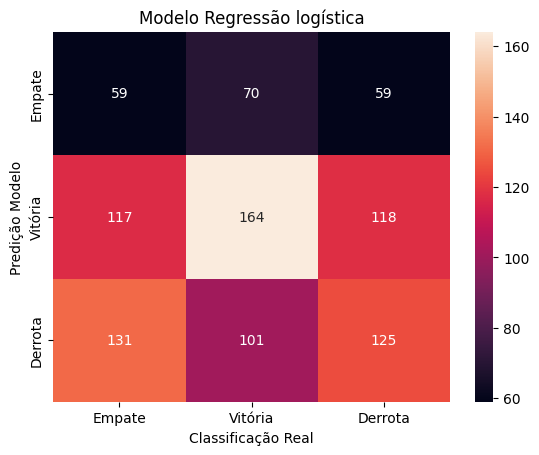

In [56]:
#imprimir a Matriz de Confusão para Regressão Logística com parametros otimizados.
y_pred_model_otm = lrgs_loaded.predict(X_test_bal)

lrgs_cm = metrics.confusion_matrix(y_pred_model_otm, y_test_bal)

sns.heatmap(lrgs_cm, annot=True, fmt='.0f', xticklabels = ["Empate", "Vitória", "Derrota"] , yticklabels = ["Empate", "Vitória", "Derrota"] )

plt.ylabel('Predição Modelo')
plt.xlabel('Classificação Real')
plt.title('Modelo Regressão logística')

In [57]:
#type(mlp_cm)
type(confusion_matrix)

numpy.ndarray

In [58]:
#mlp_cm
confusion_matrix = lrgs_cm
confusion_matrix

array([[ 59,  70,  59],
       [117, 164, 118],
       [131, 101, 125]])

In [59]:
# Cálculo da precisão por classe
precision_classes = []
for i in range(3):
    precision_classes.append(confusion_matrix[i, i] / np.sum(confusion_matrix[:, i]))

# Impressão dos resultados
print("Precisão por classe:")
print(f"Empate : {precision_classes[0]:.4f}")
print(f"Vitória: {precision_classes[1]:.4f}")
print(f"Derrota: {precision_classes[2]:.4f}")

# f"Valor: {valor:.4f}"

# Cálculo da precisão geral
precision_geral = np.trace(confusion_matrix) / np.sum(confusion_matrix)

# Impressão da precisão geral
print("Precisão geral:", precision_geral)

# A precisão mede a proporção de previsões positivas feitas pelo modelo que
# estão corretas. Em outras palavras, ela indica a confiabilidade das previsões
# do modelo.

# Uma alta precisão para uma classe indica que o modelo é confiável na
# identificação de exemplos dessa classe.
# Uma baixa precisão pode indicar que o modelo está confundindo a classe com
# outras classes.

# A precisão é sensível ao desequilíbrio de classes.
# Se uma classe for muito mais frequente que as outras, a precisão geral pode
# ser alta mesmo que o modelo tenha um desempenho ruim na identificação das
# classes menos frequentes.

Precisão por classe:
Empate : 0.1922
Vitória: 0.4896
Derrota: 0.4139
Precisão geral: 0.3686440677966102


In [60]:
# Cálculo do recall por classe
recall_classes = []
for i in range(3):
    recall_classes.append(confusion_matrix[i, i] / np.sum(confusion_matrix[i, :]))

# Impressão dos resultados
print("Recall por classe:")
print(f"Empate : {recall_classes[0]:.4f}")
print(f"Vitória: {recall_classes[1]:.4f}")
print(f"Derrota: {recall_classes[2]:.4f}")

#==============================================================================
# Recall = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)
#==============================================================================
# O recall é uma métrica importante para avaliar a capacidade do modelo de
# identificar todos os exemplos de uma classe, mesmo que isso signifique que ele
# irá classificar incorretamente alguns exemplos de outras classes.

Recall por classe:
Empate : 0.3138
Vitória: 0.4110
Derrota: 0.3501


In [61]:
# Cálculo da acurácia
accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)

# Impressão do resultado
print("Acurácia:", accuracy)

# É importante verificar se a matriz de confusão está correta antes de calcular
# a acurácia.
# A acurácia é uma métrica simples que indica a proporção de exemplos que foram
# classificados corretamente pelo modelo. No entanto, ela pode ser enganosa em
# casos de desbalanceamento de classes, quando uma classe é muito mais frequente
# que as outras.

Acurácia: 0.3686440677966102


In [62]:
# Cálculo do F1-score por classe
f1_classes = []
for i in range(3):
    precision = confusion_matrix[i, i] / np.sum(confusion_matrix[:, i])
    recall = confusion_matrix[i, i] / np.sum(confusion_matrix[i, :])
    f1_classes.append(2 * (precision * recall) / (precision + recall))

# Impressão dos resultados
print("F1-score por classe:")
print(f"Empate : {f1_classes[0]:.4f}")
print(f"Vitória: {f1_classes[1]:.4f}")
print(f"Derrota: {f1_classes[2]:.4f}")

# Cálculo do F1-score geral
f1_geral = np.mean(f1_classes)

# Impressão do resultado
print("F1-score geral:", f1_geral)

# F1-score = 2 * (Precisão * Recall) / (Precisão + Recall)
# O F1-score é uma métrica que combina precisão e recall em uma única medida,
# sendo útil para avaliar o desempenho do modelo em problemas de classificação
# com múltiplas classes.

F1-score por classe:
Empate : 0.2384
Vitória: 0.4469
Derrota: 0.3794
F1-score geral: 0.35487099803688804


In [63]:
# #imprimir a Matriz de Confusão para Regressão Logística com parametros otimizados.
# y_pred_model_otm_2 = gslr_loaded.predict(X_test_bal)

# gslr_cm = metrics.confusion_matrix(y_pred_model_otm_2, y_test_bal)

# sns.heatmap(gslr_cm, annot=True, fmt='.0f', xticklabels = ["Empate", "Vitória", "Derrota"] , yticklabels = ["Empate", "Vitória", "Derrota"] )

# plt.ylabel('Predição Modelo')
# plt.xlabel('Classificação Real')
# plt.title('Modelo Regressão logística')

In [64]:
# #imprimir a Matriz de Confusão para Regressão Logística com parametros otimizados.
# y_pred_model_otm_3 = gslr_b_loaded.predict(X_test_bal)

# gslr_b_cm = metrics.confusion_matrix(y_pred_model_otm_3, y_test_bal)

# sns.heatmap(gslr_b_cm, annot=True, fmt='.0f', xticklabels = ["Empate", "Vitória", "Derrota"] , yticklabels = ["Empate", "Vitória", "Derrota"] )

# plt.ylabel('Predição Modelo')
# plt.xlabel('Classificação Real')
# plt.title('Modelo Regressão logística')

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
# https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression